# Random Forests

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Random Forests

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


from preprocess import data

np.random.seed(0)


In [31]:
x_tl = data["x_timed_lagged"].reset_index(drop=True).shift(1)
x_germany = data["x_germany"].reset_index(drop=True)
x_austria = data["x_austria"].reset_index(drop=True)
y_germany = data["y_germany"].reset_index(drop=True)
y_austria = data["y_austria"].reset_index(drop=True)

In [32]:
X_ger = pd.concat([x_germany, x_tl], axis=1).dropna().drop(columns=["DATE_FROM"]).reset_index(drop=True) #drop the first row of the df due to .shift(1)
X_aust = pd.concat([x_austria, x_tl], axis=1).dropna().drop(columns=["DATE_FROM"]).reset_index(drop=True)

y_ger = y_germany.iloc[1:].reset_index(drop=True)
y_aus = y_austria.iloc[1:].reset_index(drop=True)

## Classical Random Forest

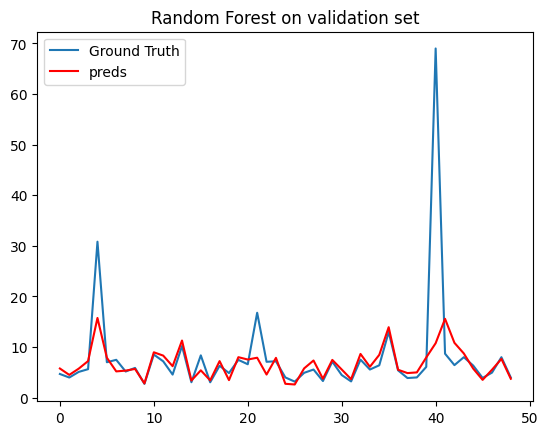

Mean Squared Error: 77.98695123632653


In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X_ger, y_ger, test_size=0.2)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_valid)

# Evaluate the model
plt.plot(y_valid.reset_index(drop=True), label='Ground Truth')
plt.plot(y_pred, color='red', label='preds')
plt.title("Random Forest on validation set")
plt.legend()
plt.show()

mse = mean_squared_error(y_valid.reset_index(drop=True), y_pred)
print(f'Mean Squared Error: {mse}')

## Without split

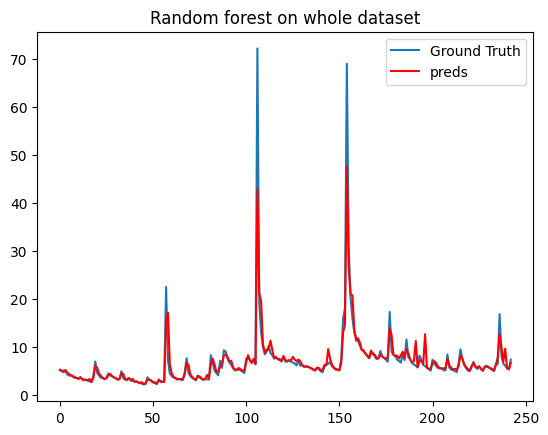

Mean Squared Error: 7.337916132057604


In [27]:


model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_ger, y_ger)

# Make predictions on the test set
y_pred = model.predict(X_ger)

# Evaluate the model
plt.plot(y_ger, label='Ground Truth')
plt.plot(y_pred, color='red', label='preds')
plt.title('Random forest on whole dataset')
plt.legend()
plt.show()

mse = mean_squared_error(y_ger.reset_index(drop=True), y_pred)
print(f'Mean Squared Error: {mse}')

## Dynamic Random Forest

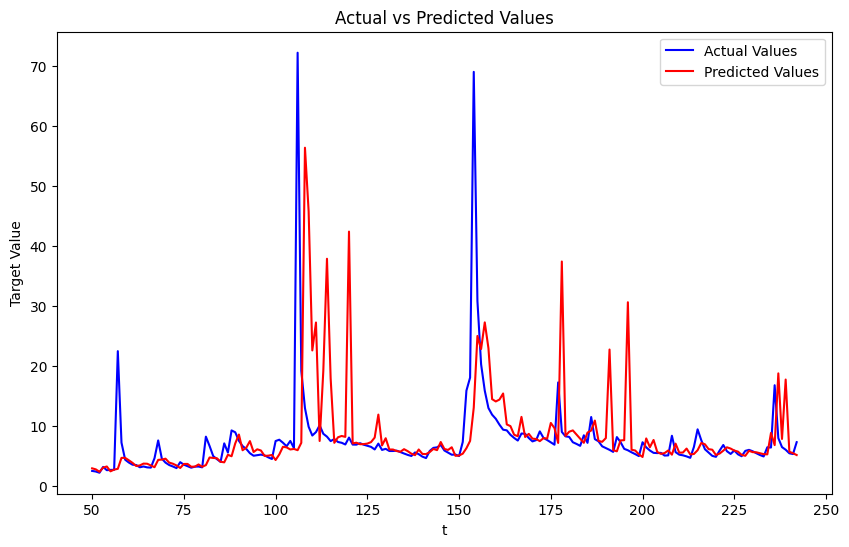

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

X = X_ger
y = y_ger

# Initialize the model
model = RandomForestRegressor(n_estimators=50, random_state=42)

# Lists to store the actual and predicted values
actual_values = []
predicted_values = []

# Loop over t from 50 to the length of the dataset
for t in range(50, len(X)):
    # Split the data
    X_train = X[:t]
    y_train = y[:t]
    X_test = X.iloc[[t]]  # Reshape to 2D array for prediction

    # Train the model
    model.fit(X_train, y_train)

    # Make prediction on the t-th sample
    y_pred = model.predict(X_test)
    
    # Store the actual and predicted values
    actual_values.append(y[t])
    predicted_values.append(y_pred[0])

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(50, len(X)), actual_values, label='Actual Values', color='blue')
plt.plot(range(50, len(X)), predicted_values, label='Predicted Values', color='red')
plt.xlabel('t')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()